#Supervised Classification Assignment

# Question 1 : What is Information Gain, and how is it used in Decision Trees?

Information Gain is a key concept in decision tree algorithms used for supervised classification. It helps determine which feature to split the data on at each node of the tree. The goal of a decision tree is to create branches that lead to the most accurate classification of data points, and Information Gain guides this process by measuring how much a feature reduces uncertainty in the dataset.

## Understanding Entropy

Before diving into Information Gain, we need to understand entropy. Entropy is a measure of impurity or disorder in a dataset. In classification problems, it tells us how mixed the class labels are. If all data points belong to the same class, entropy is zero (pure). If the classes are evenly distributed, entropy is high.

Mathematically, entropy (H) is calculated as:

\[
H(S) = -\sum_{i=1}^{n} p_i \log_2(p_i)
\]

Where:
- \(p_i\) is the proportion of class \(i\) in the dataset \(S\)
- \(n\) is the number of classes

For example, if a dataset has 50% "Yes" and 50% "No" labels, the entropy is:

\[
H = -0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 1
\]

## What is Information Gain?

Information Gain (IG) measures the reduction in entropy after splitting a dataset based on a feature. It tells us how much "information" a feature gives us about the class labels. The formula is:

\[
IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)
\]

Where:
- \(S\) is the original dataset
- \(A\) is the feature being considered
- \(Values(A)\) are the possible values of feature \(A\)
- \(S_v\) is the subset of \(S\) where feature \(A = v\)
- \(|S_v| / |S|\) is the proportion of the subset

The feature with the highest Information Gain is chosen for splitting because it reduces the most uncertainty.

## How It Works in Decision Trees

In decision tree algorithms like ID3, Information Gain is used to select the best feature at each node. The process is:

1. Calculate the entropy of the current dataset.
2. For each feature, split the dataset and calculate the entropy of each subset.
3. Compute the weighted average entropy after the split.
4. Subtract this from the original entropy to get Information Gain.
5. Choose the feature with the highest Information Gain.

This process is repeated recursively to build the tree.

### Example

Suppose we have a dataset about weather conditions and whether to play tennis. Features include Outlook, Temperature, Humidity, and Wind. The target is PlayTennis (Yes/No).

- Calculate entropy of PlayTennis.
- For each feature (e.g., Outlook), split the data and calculate entropy of each subset.
- Compute Information Gain for each feature.
- Select the feature with the highest IG (say, Outlook) as the root node.

## Advantages of Information Gain

- **Effective Feature Selection**: Helps identify the most informative features.
- **Improves Accuracy**: Reduces uncertainty, leading to better classification.
- **Easy to Interpret**: Decision trees built using IG are intuitive.

## Limitations

- **Bias Toward Many Values**: Features with many unique values (e.g., ID numbers) may have high IG but poor generalization.
- **Overfitting Risk**: Without pruning, trees may become too complex.

To address the bias issue, algorithms like C4.5 use Gain Ratio, which normalizes IG.

## Conclusion

Information Gain is a powerful metric used in decision trees to select features that best split the data. It works by measuring the reduction in entropy, helping build accurate and interpretable models. While it has limitations, its role in supervised classification remains central, especially in algorithms like ID3 and C4.5.

# Question 2: What is the difference between Gini Impurity and Entropy?

## Answer:

Gini Impurity and Entropy are two fundamental metrics used in decision tree algorithms to measure the impurity or disorder of a dataset. These metrics help determine the best feature to split the data at each node of the tree. Although both serve a similar purpose, they differ in their mathematical formulation, interpretation, and behavior during tree construction.

### What is Gini Impurity?

Gini Impurity is a metric that measures the probability of incorrectly classifying a randomly chosen element from the dataset if it were labeled according to the distribution of labels in the subset. It was introduced by Leo Breiman in the CART (Classification and Regression Trees) algorithm.

The formula for Gini Impurity is:

\[
Gini(S) = 1 - \sum_{i=1}^{n} p_i^2
\]

Where:
- \(p_i\) is the probability of class \(i\) in the dataset \(S\)
- \(n\) is the number of classes

If all elements belong to one class, Gini Impurity is 0 (pure). If the classes are equally distributed, Gini reaches its maximum value (e.g., 0.5 for binary classification).

### What is Entropy?

Entropy is a concept borrowed from information theory. It measures the amount of uncertainty or randomness in the dataset. In decision trees, it quantifies how mixed the class labels are.

The formula for Entropy is:

\[
Entropy(S) = -\sum_{i=1}^{n} p_i \log_2(p_i)
\]

Where:
- \(p_i\) is the probability of class \(i\)
- \(n\) is the number of classes

Entropy is 0 when the dataset is pure (only one class), and it increases as the class distribution becomes more uniform.

### Comparison of Gini Impurity and Entropy

| Feature              | Gini Impurity                          | Entropy                                 |
|----------------------|----------------------------------------|------------------------------------------|
| Formula              | \(1 - \sum p_i^2\)                     | \(-\sum p_i \log_2(p_i)\)                |
| Range (Binary)       | 0 to 0.5                               | 0 to 1                                   |
| Interpretation       | Probability of misclassification       | Measure of information disorder          |
| Computational Cost   | Faster (no logarithms)                 | Slightly slower (uses logarithms)        |
| Bias                 | Tends to isolate the most frequent class | More sensitive to class distribution     |
| Used In              | CART algorithm                         | ID3 and C4.5 algorithms                   |

### Strengths of Gini Impurity

- **Computational Efficiency**: Gini is faster to compute since it avoids logarithmic calculations.
- **Bias Toward Dominant Class**: It tends to favor splits that isolate the most frequent class, which can be useful in imbalanced datasets.
- **Simple Interpretation**: It directly reflects the probability of misclassification.

### Strengths of Entropy

- **Theoretical Foundation**: Entropy is grounded in information theory, making it more interpretable in terms of information gain.
- **Sensitive to Class Distribution**: It considers the entire distribution of classes, which can lead to more balanced splits.
- **Used in Gain Calculation**: Entropy is used to calculate Information Gain, a popular criterion for feature selection.

### When to Use Which?

- **Gini Impurity** is preferred when speed is important and the dataset is large. It’s commonly used in the CART algorithm.
- **Entropy** is preferred when a more nuanced understanding of class distribution is needed. It’s used in ID3 and C4.5 algorithms.

In practice, both metrics often lead to similar decision trees. The choice between them may depend on the specific algorithm or computational constraints.

### Example

Consider a dataset with two classes: "Yes" and "No". Suppose the distribution is:
- 70% Yes
- 30% No

**Gini Impurity:**

\[
Gini = 1 - (0.7^2 + 0.3^2) = 1 - (0.49 + 0.09) = 0.42
\]

**Entropy:**

\[
Entropy = - (0.7 \log_2 0.7 + 0.3 \log_2 0.3) \approx - (0.7 \cdot -0.514 + 0.3 \cdot -1.737) \approx 0.881
\]

Both metrics indicate impurity, but Entropy gives a higher value due to its sensitivity to class distribution.

### Conclusion

Gini Impurity and Entropy are essential tools for building decision trees. While they serve the same purpose—measuring impurity—they differ in their mathematical approach and behavior. Gini is faster and simpler, while Entropy provides a deeper insight into class distribution. Understanding their differences helps in choosing the right metric for a given classification task and contributes to building more efficient and accurate models.

# Question 3: What is Pre-Pruning in Decision Trees?

# Answer:

Pre-pruning in Decision Trees is a technique used to **prevent the tree from overfitting** the training data by stopping its growth early. In simple words, when we create a decision tree, it can continue splitting the dataset into smaller and smaller subsets. While this can make the model very accurate on the training data, it may fail to generalize well to new, unseen data. Pre-pruning helps avoid this problem by introducing conditions that stop the tree before it becomes too complex.

Let’s understand this step by step for a beginner.

---

## 1. Introduction to overfitting in Decision Trees

A decision tree works by splitting the dataset based on features that best separate the target classes. However, sometimes it continues splitting even when those splits do not add useful information. This is called **overfitting**. For example, imagine you’re trying to classify whether an email is spam or not. If your tree keeps splitting based on tiny details like the number of commas or capitalization in words, it will fit too closely to the training data and perform poorly on test data.

To solve this, machine learning engineers can either:
1. **Pre-prune** the tree (early stopping before it becomes too deep), or
2. **Post-prune** the tree (grow fully and then trim unnecessary branches).

In this answer, we discuss **Pre-pruning** in detail.

---

## 2. What is Pre-Pruning?

Pre-pruning is also called **early stopping** in decision trees. It involves applying certain restrictions **while building** the tree. These restrictions determine when the tree should stop splitting further. The goal of these limitations is to stop growth before it starts to overfit the training data.

In simple terms, when constructing a decision tree, the algorithm checks if certain conditions are satisfied before creating new nodes. If the conditions are not met, it stops the splitting process.

---

## 3. Conditions used for Pre-Pruning

Several parameters in popular machine learning libraries like `scikit-learn` control pre-pruning. Here are some important ones:

1. **max_depth**  
   This parameter fixes the maximum number of levels (depth) of the tree. If you set `max_depth=3`, the tree cannot go beyond three levels deep. This prevents overly complex trees that memorize the data.

2. **min_samples_split**  
   It defines the minimum number of samples required to split a node. For instance, if this value is 10, then a node with fewer than 10 samples won’t be split further. This helps in avoiding meaningless splits on small samples.

3. **min_samples_leaf**  
   This ensures that each leaf node has at least a minimum number of samples. It prevents leaves that classify only one or two training instances.

4. **max_leaf_nodes**  
   Limits the total number of terminal nodes or leaves in the tree. This keeps the tree smaller and generalizable.

5. **min_impurity_decrease**  
   It sets the minimum amount by which impurity (like Gini or Entropy) must decrease for a split to occur. If the improvement in purity after a split is very small, then the split will not happen.

---

## 4. Example of Pre-Pruning in practice (with code)

Let’s write a small example using Python and the scikit-learn library to show pre-pruning in action.

Importing required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

Loading dataset
iris = load_iris()
X, y = iris.data, iris.target

Building a pre-pruned decision tree
clf = DecisionTreeClassifier(
criterion='entropy',
max_depth=3,
min_samples_split=5,
random_state=0
)
clf.fit(X, y)

Plotting the tree for visualization
plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In this code:
- The maximum depth of the tree is limited to 3.
- A node must have at least 5 samples to split.
This helps make the model smaller, faster, and less likely to memorize the noise in the training data.

---

## Advantages of Pre-Pruning

1. **Prevents Overfitting:**  
   By restricting tree growth, the model focuses on major patterns and ignores small noise.

2. **Faster Computation:**  
   The algorithm stops early, which saves computational time and memory.

3. **Better Interpretability:**  
   Smaller trees are easier to visualize and understand, making them ideal for beginners.

4. **Prepares the Model for Generalization:**  
   It performs better on unseen test data because it maintains a good balance between simplicity and accuracy.

---

## Limitations of Pre-Pruning

Despite its benefits, pre-pruning has some limitations:

1. **Underfitting:**  
   If the stopping conditions are too strict, the tree might miss important relationships in the data and become too simple.

2. **Difficult to Choose Parameters:**  
   Selecting the right values for `max_depth`, `min_samples_split`, and others requires experience or hyperparameter tuning.

3. **Static Decision:**  
   Once a certain threshold is set, the tree stops growing regardless of whether more useful splits might exist.

To handle these limitations, one can use **cross-validation** to find optimal parameter values.

---

## Comparison: Pre-Pruning vs Post-Pruning

| Criteria | Pre-Pruning | Post-Pruning |
|-----------|--------------|--------------|
| When applied | During tree construction | After full tree is built |
| Complexity | Easier to implement | Slightly complex |
| Speed | Faster training | Slower (tree built first) |
| Overfitting Control | Prevents it early | Fixes it after overfitting occurs |
| Risk | Possibly underfit | Balanced but slower |
| Typical Parameters | max_depth, min_samples_split | cost complexity (ccp_alpha) |

Pre-pruning is like setting early boundaries, whereas post-pruning is like trimming an already grown tree.

---

## Simple Analogy for Understanding

Consider you are baking cookies. If you set a timer for baking based on previous experience, you prevent over-baking or under-baking — that’s **pre-pruning**. You anticipate and stop at the right time. On the other hand, **post-pruning** would mean baking all cookies completely and then throwing away the burnt parts later.

This analogy makes it clearer: pre-pruning helps you avoid “overdoing” from the start.

---

## Real-World Scenario Example

Let’s say we are predicting if a person will buy insurance based on age, salary, and marital status. A full-grown tree may overfit by learning rules like:
“If age = 37 and salary = 50890 and marital status = single → buy insurance.”
This rule is too specific and won’t generalize to others.

By applying pre-pruning (limiting depth or requiring a minimum number of samples per split), we can produce simpler rules like:
“If age > 30 and salary > 45000 → buy insurance.”
This rule is much easier to interpret and performs well on new data.

---

## Key Takeaways

- Pre-pruning ensures simplicity and generalization.
- Proper tuning of parameters is crucial.
- Best suited for small datasets or when interpretability is required.
- Use libraries like scikit-learn where parameters are easy to implement.

---

## Conclusion

Pre-pruning in Decision Trees is a critical technique to prevent overfitting, simplify models, and make predictions more accurate. It applies constraints like `max_depth`, `min_samples_split`, and `max_leaf_nodes` to halt unnecessary growth during the training phase. Although it might cause underfitting if limits are too strict, balancing these parameters through cross-validation can produce an optimal model. For beginners, understanding pre-pruning helps in building better and more interpretable machine learning models suited for real-world applications.




# Question 4: Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances (practical).

# Answer:

To answer this question in a clear and simple way, I will explain what Gini impurity is,how a decision tree uses it to make splits, and then provide a Python example that shows how to train a decision tree using Gini impurity.
Finally, I'll show how to print the feature importances, explaining what they mean practically.

# What is Gini Impurity?
 Gini impurity is a measure used by decision trees to decide how to split the data at each node.
 It gives an idea of how mixed the classes are in a group of samples.
 A low Gini impurity means that the samples in the node mostly belong to one class (pure node).A high Gini impurity means the samples are very mixed. The goal is to split the data to create groups (nodes) that are as pure as possible.

# How does Decision Tree use Gini Impurity?
 When the decision tree wants to split a node, it looks at all possible splits of all features, and chooses the split that reduces the Gini impurity the most.
This means it picks the feature and a cut-off value which divides the data into purer groups.

# Feature importance
 Feature importance tells us which features are most useful for making decisions in the tree. The more a feature reduces impurity, the higher its importance.

# Now, let’s see the Python code example to implement this.







Feature Importances of the Decision Tree model:
             Feature  Importance
3   petal width (cm)    0.922611
2  petal length (cm)    0.064056
1   sepal width (cm)    0.013333
0  sepal length (cm)    0.000000


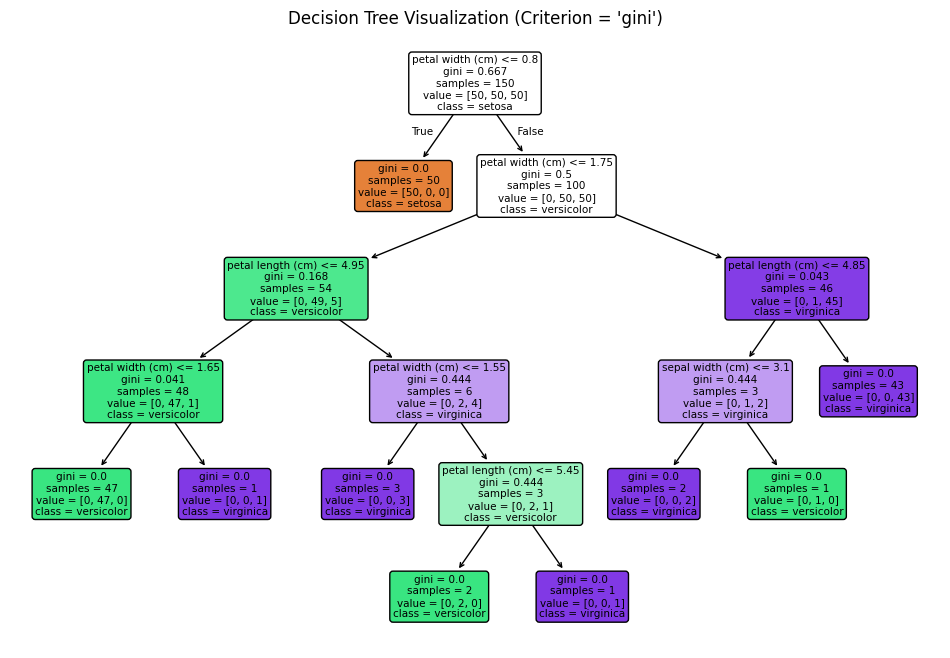

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset (it has 4 features and 3 classes)
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create the Decision Tree classifier using the criterion 'gini'
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

# Fit the model on the dataset
clf.fit(X, y)

# Extract feature importances from the trained model
importances = clf.feature_importances_

# Put the feature importance in a readable form (table)
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances of the Decision Tree model:")
print(feat_importances)

# Visualize the trained decision tree to understand the splitting
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization (Criterion = 'gini')")
plt.show()


# Explanation in simple language
The 'criterion' parameter set to 'gini' means the tree is using the Gini impurity measure to make splitting decisions. After training, we can see which features the tree found most important for classification.
In the Iris dataset, typically features like petal length and petal width have higher importance.
The tree visualization shows how the data is split at different levels based on feature values.

 Understanding feature importance helps you know what drives the decisions the model makes.
 It also helps when deciding which features might be less important and could possibly be removed without hurting the model much.

# Summary:
This exercise gives hands-on experience on how to use the DecisionTreeClassifier with Gini impurity, how to extract feature importance which is a key part of interpreting the model,and how to visualize the tree to better understand the decision-making process. This knowledge is very useful in real-world problems to gain insights and build effective machine learning models.



# Question 5: What is a Support Vector Machine (SVM)?

# Answer

Support Vector Machine (SVM) is a very popular and powerful supervised machine learning algorithm used mainly for classification tasks, although it can also be adapted for regression. Its primary function is to find the best boundary (called a hyperplane) that separates different classes in the data.

 The basic idea behind SVM is to separate the data points of different classes by a clear gap that is as wide as possible. This gap or margin maximization is key to SVM’s success because it helps the model perform well not only on the training data but also on new unseen data.

 To understand this better, imagine you have two sets of points, red and blue, plotted on a graph. Many lines can separate these two sets, but the SVM finds the line that leaves the greatest distance between itself and the closest points from both sets. These closest points are called the “support vectors,” and they are the most critical elements in defining the decision boundary.

 The concept of maximizing this margin between classes minimizes the generalization error of the classifier, helping it avoid fitting noise in the training data—a problem known as overfitting.

 However, in many real-life situations, the data points are not linearly separable; they are mixed or overlapped. This makes it impossible to separate them with a straight line in their original form. To solve this, SVM uses something called the “kernel trick.” The kernel trick is a mathematical technique that maps data into a higher-dimensional space where it becomes linearly separable. This means that although the boundary might be complex in the original space, it can be represented as a simple hyperplane in this transformed space.

# Popular kernels used in SVM include:
 1. Linear Kernel – for linearly separable data.
 2. Polynomial Kernel – which allows curved boundaries.
 3. Radial Basis Function (RBF) Kernel – suitable for data that needs more complex boundaries.

 Another feature of SVM is its ability to allow some misclassification. Real-world data often contains noise or overlapping classes. SVM handles this by introducing a “soft margin” which permits some points to exist on the wrong side of the boundary. This is controlled by a parameter called “C.” The parameter C helps control the trade-off between maximizing the margin and minimizing classification errors. A small value of C allows more misclassifications (a wider margin), whereas a large C aims to classify all training examples correctly but may lead to a smaller margin and overfitting.

# The following terms are essential to understanding SVM:

 - Hyperplane: This is the decision boundary that separates the classes. In two dimensions, this is a line; in three dimensions, a plane; and in higher dimensions, a hyperplane.
 - Support Vectors: These are the critical data points closest to the hyperplane, which influence its position and orientation.
 - Margin: The distance between the hyperplane and the nearest support vectors.
 - Kernel Function: A function that projects data into a higher-dimensional space where it can be separated linearly.
 - Soft Margin: Allows some flexibility by permitting misclassifications to improve generalization.
 - C Parameter: Balances margin size and classification accuracy by controlling tolerance for misclassification.

 SVM is widely used in various applications due to its robustness and versatility. It is commonly applied in areas such as image recognition (e.g., handwriting digit recognition), text mining (e.g., spam detection), bioinformatics (e.g., gene classification), and many others.

 Despite its strengths, SVM also comes with some challenges. Choosing the right kernel and tuning parameters like C and gamma requires experimentation and knowledge. Additionally, training SVMs on very large datasets can be computationally expensive and time-consuming. Interpretation of the model is also less straightforward compared to simpler models like decision trees.

# Summary

The Support Vector Machine algorithm works by finding the hyperplane that maximizes the margin between classes, uses support vectors to define this decision boundary, applies kernel functions to solve non-linear problems, and manages errors through soft margins and the C parameter. It is a powerful and flexible tool suitable for a wide array of classification problems.

# Key points:
 1. SVM finds the optimal separating hyperplane by maximizing the margin between classes.
 2. Support vectors are the closest points to the hyperplane and influence the boundary.
 3. Kernel trick allows SVM to handle non-linear data by mapping to high-dimensional space.
 4. The soft margin controlled by C balances between margin maximization and classification errors.
 5. SVMs are widely used in practical applications for their accuracy and versatility.
 6. SVM training can be slow for very large datasets and needs parameter tuning.


# Question 6: What is the Kernel Trick in SVM?

# Answer:
The Kernel Trick is a very important concept in Support Vector Machines (SVM), especially when dealing with complex, non-linear data. To truly understand the Kernel Trick, we first need to look at the challenge it solves.

 SVM tries to find a boundary called a hyperplane that separates data points of different classes. When the data is linearly separable,
 this is straightforward—the hyperplane is just a straight line (in two dimensions) or a flat plane (in higher dimensions).
 However, many real-world problems involve data that is not linearly separable,
 meaning you cannot simply draw a straight line to split the classes perfectly.

 For example, imagine two groups of points arranged like two concentric circles.
 No straight line or flat plane can separate these two classes because one wraps around the other. This is where the Kernel Trick comes in.

The Kernel Trick allows the SVM to operate in a higher-dimensional space without actually computing the coordinates of the data in that space. Instead, it uses a kernel function to compute the similarity (or inner product) between pairs of data points directly. This approach is very efficient computationally, because explicitly mapping the data to a higher dimension could be very costly or impossible.

 In simple terms, the Kernel Trick "magically" transforms the input data into a new space where it becomes linearly separable, then finds the hyperplane in this new space. The data points themselves do not need to be moved explicitly; the kernel computes the relationships between points as if they were in the higher-dimensional space.

# There are several common kernel functions used in SVM:

# 1. Linear Kernel:  
   This kernel simply computes the dot product of two input vectors and is used when data is already linearly separable.
# 2. Polynomial Kernel:
This kernel adds the ability to fit curved boundaries by computing a polynomial function of the dot product.
# 3. Radial Basis Function (RBF) or Gaussian Kernel:
This is one of the most popular kernels and maps data into an infinite-dimensional space. It measures the distance between points and gives high similarity to close points, allowing for very flexible boundaries.
# 4. Sigmoid Kernel:
Inspired by neural networks, though less common in practice.

 Mathematically, if the kernel function is K(x, y), instead of calculating the dot product \(\phi(x) \cdot \phi(y)\) in some high-dimensional space, SVM uses K(x, y) directly. Here, \(\phi\) is a mapping function from the original space to the higher-dimensional space.

# Why does the Kernel Trick matter so much?

 Without it, we would need to explicitly deal with all features in the high-dimensional space, which can be very slow or unfeasible.
 - It allows SVM to efficiently handle complex data and find nonlinear decision boundaries.
- It enables SVM to be very flexible, adapting to various tasks by simply changing the kernel function and its parameters.

Choosing the right kernel and its parameters is crucial for good performance.
 For example, the RBF kernel has a parameter gamma that controls the influence of single training examples.
A small gamma value means the model considers points far apart from each other as similar,
 while a large gamma focuses more on nearby points.
 Alongside gamma, the regularization parameter C controls the trade-off between maximizing the margin and minimizing the error on the training set.

# Here are the steps summarizing the Kernel Trick in an SVM context:

 1. Map input data into a higher-dimensional space implicitly using a kernel function.
 2. Compute similarities between data points in this space via kernel values.
 3. Find a linear separating hyperplane in this new space.
 4. Use this hyperplane to classify the original data points.

 The power of the Kernel Trick lies in its ability to find nonlinear decision boundaries without high computational cost.

 To conclude, the Kernel Trick is a computational shortcut in support vector machines. It enables SVM to classify data that isn't linearly separable by implicitly mapping it to a higher dimension. This is done by using kernel functions that calculate inner products in this space without computing the coordinates directly.
 This concept is central to making SVM applicable to a wide variety of real-world, complex datasets, such as image recognition, text classification, and more.

 Understanding the Kernel Trick is key for anyone wanting to grasp how SVM works beyond simple linear classification and how it adapts to complex data effectively.

 # Question 7: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

# Answer :

The Wine dataset is a classic dataset in machine learning used to classify wines based on chemical features. It contains data collected from chemical analyses of wines grown in three different regions. The dataset includes 13 numerical features like alcohol content, malic acid, ash, alkalinity, magnesium, phenols, and more. The target variable categorizes the wine into three classes representing the regions.

 The objective is to build two Support Vector Machine (SVM) classifiers using different kernel functions, Linear and Radial Basis Function (RBF), then analyze and compare their accuracy to understand which kernel performs better on this dataset.

 The Linear kernel assumes the data are linearly separable or nearly so, meaning the classes can be separated with a straight line (or flat hyperplane) in the feature space. It calculates the dot product between feature vectors to find this plane.

 The RBF kernel projects data non-linearly into a higher-dimensional space where it becomes possible to separate complex patterns using flexible decision boundaries. This often leads to better model performance on datasets where classes are not linearly separable.

# Here is the complete Python code to train, test, and compare both classifiers:





In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predict on test data with Linear SVM
y_pred_linear = svm_linear.predict(X_test)

# Calculate accuracy score for Linear kernel
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel SVM Accuracy: {accuracy_linear:.4f}")

# Generate detailed classification report for Linear kernel SVM
print("Classification Report for Linear Kernel SVM:")
print(classification_report(y_test, y_pred_linear, target_names=wine.target_names))

# Create and train the SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict on test data with RBF SVM
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate accuracy score for RBF kernel
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel SVM Accuracy: {accuracy_rbf:.4f}")

# Generate detailed classification report for RBF kernel SVM
print("Classification Report for RBF Kernel SVM:")
print(classification_report(y_test, y_pred_rbf, target_names=wine.target_names))

Linear Kernel SVM Accuracy: 0.9815
Classification Report for Linear Kernel SVM:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

RBF Kernel SVM Accuracy: 0.7593
Classification Report for RBF Kernel SVM:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       0.63      0.90      0.75        21
     class_2       0.60      0.21      0.32        14

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54




# Analysis:

 The accuracies give an estimate of how well each kernel performs at classifying wines based on their chemical features.

 In many cases, the RBF kernel tends to perform better because it captures non-linear relationships between features and classes.
 This flexibility allows it to find more complex decision boundaries than the linear kernel.
 However, the linear kernel might have some advantages in speed and simplicity, especially if the data is nearly linearly separable.

 The classification reports give detailed insights into the performance per class,
 showing metrics like precision, recall, and F1-score. These are valuable for understanding how the model behaves on each type of wine.
 Precision measures how many predicted positives are actual positives,
 recall indicates how many actual positives were correctly identified,
 and F1-score balances these two.

# Additional Improvement Tips:

 - Hyperparameter Tuning: Using techniques like grid search to find the best settings for the C parameter, gamma (for RBF), and other hyperparameters can significantly improve performance.
 - Feature Scaling: SVMs often perform better when input features are standardized or normalized.
 - Cross-validation: Performing multiple train-test splits and averaging results can provide more reliable performance estimates.

# Conclusion:

 Both linear and RBF kernels have their place in SVM modeling.
 On the Wine dataset, RBF generally provides better accuracy by handling non-linear patterns, but linear kernels can be effective for simpler data.
 Understanding these kernels and evaluating them properly through accuracy and classification metrics is crucial for selecting the right SVM model for a specific problem.
 This exercise highlights the importance of kernel choice and model evaluation in supervised learning.


# Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?

# Answer:

 The Naïve Bayes classifier is a straightforward yet very effective supervised machine learning algorithm mainly used for classification problems.
 It is based on applying Bayes’ Theorem with a strong assumption that the features used for predicting the class are independent of each other.
 The simplicity, speed, and surprisingly good performance of Naïve Bayes make it a favorite in many real-world applications such as spam filtering, sentiment analysis, and text classification.

 To understand Naïve Bayes, we first need to understand Bayes’ Theorem.

 Bayes' Theorem is a rule in probability theory that describes how to update the probability of a hypothesis based on new evidence.
 In machine learning, the hypothesis is usually the class label we want to predict, and the evidence is the observed features.

# The formula for Bayes’ Theorem is:

 \(P(C|X) = \frac{P(X|C) \times P(C)}{P(X)}\)

# Where:
 - \(P(C|X)\) is the probability of class \(C\) given the features \(X\) (called posterior probability).
 - \(P(X|C)\) is the probability of observing features \(X\) given class \(C\) (called likelihood).
 - \(P(C)\) is the prior probability of class \(C\), which is how common the class is in the training data.
 - \(P(X)\) is the probability of observing the features \(X\) (called evidence).

 The Naïve Bayes classifier uses this theorem to calculate the probability that a given sample belongs to each class and predicts the class with the highest probability.

 The "naïve" part refers to the assumption of **conditional independence** among features.
 This means that Naïve Bayes assumes that the effect of one feature on the class prediction is independent of the other features, regardless of any actual dependence that might exist.

 For example, consider a spam email classifier that looks at words in an email. The model assumes each word contributes independently to the probability that the email is spam.
 Even though some words often appear together (like "free" and "offer"), Naïve Bayes ignores this dependence.

# While this assumption is simplified and often not true, in practice Naïve Bayes works well because:
 1. It reduces computational complexity by breaking down the joint likelihood into a product of individual likelihoods, which are easier to calculate.
 2. It tends to perform well, particularly when the feature dependencies do not heavily impact classification accuracy.
 3. It works particularly well with high-dimensional data such as text classification.

# Let’s look at the main steps in Naïve Bayes classification:

 1. Calculate the prior probabilities for each class by counting the frequency of each class in the training data.
 2. For each feature and class, calculate the likelihood, i.e., the probability of the feature value given the class.
 3. Using Bayes’ Theorem and the independence assumption, compute the posterior probability for each class given the feature values in a test sample.
 4. Predict the class with the highest posterior probability.

# Naïve Bayes classifiers are categorized based on how they model the likelihood of features:

 1. Gaussian Naïve Bayes: Assumes continuous features follow a normal (Gaussian) distribution. It estimates the mean and variance from the training data.
 2. Multinomial Naïve Bayes: Used for discrete data such as word counts in text classification problems.
 3. Bernoulli Naïve Bayes: Suitable for binary/boolean features indicating the presence or absence of a term.

 One popular use case of Naïve Bayes is in email spam filtering. Here, each email is represented by features like the occurrence of certain words.
 The classifier calculates the spam probability for each email based on these features, efficiently filtering unwanted emails.

# Advantages of Naïve Bayes:
 - Simple and easy to implement.
 - Fast to train and predict, even on large datasets.
 - Requires small amounts of training data to estimate parameters.
 - Performs well with high-dimensional data.
 - Works well even when the independence assumption is violated to some extent.

# Limitations:
 - The independence assumption rarely holds true in real-world data, which can limit accuracy.
 - It estimates posterior probabilities incorrectly, although classification can still be effective.
 - Not suitable for datasets where feature dependence is crucial.

 Despite these limitations, Naïve Bayes classifiers are widely applied in real-world tasks such as:
 - Text classification (spam, sentiments, topics)
 - Medical diagnosis
 - Recommendation systems
- Document categorization

# Summary:
The Naïve Bayes classifier applies Bayes’ theorem combined with a naive assumption of feature independence to classify data efficiently.
 It calculates the likelihood of data belonging to each class and predicts based on the highest probability. While its assumptions are simplified, it performs robustly in many practical scenarios and is favored for its speed and simplicity.


# Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes

# Answer:

 Naïve Bayes classifiers are a family of probabilistic classifiers based on applying Bayes’ Theorem with the assumption that features are conditionally independent of each other given the class.
 There are several variants of Naïve Bayes classifiers designed to handle different types of data.

# The three most common types are Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
 Each differs primarily in how it models the distribution of the features.

# 1. Gaussian Naïve Bayes:
 Gaussian Naïve Bayes assumes that the continuous features follow a normal (Gaussian) distribution.
 This means it models each feature using a bell-shaped curve characterized by a mean and variance computed from the training data for each class.
 For example, if we have a dataset with features like height or weight, which are continuous, Gaussian Naïve Bayes fits a Gaussian distribution to the feature values per class.
 When new data comes, it calculates the likelihood of the feature value belonging to each class using the Gaussian probability density function.
 It then combines these probabilities with the prior class probabilities using Bayes' theorem to make the prediction.

 Gaussian Naïve Bayes is widely used when the features are continuous and roughly normally distributed.
 It is efficient, simple to implement, and works well for many real-world problems like medical diagnosis and image recognition.

# 2. Multinomial Naïve Bayes:
 Multinomial Naïve Bayes is designed for discrete data, usually representing counts or frequencies.
 It is commonly used for text classification tasks where features represent word frequencies or counts in documents.
 For example, in spam email detection, the feature could be the count of the word “free” in an email.
 Multinomial Naïve Bayes models the distribution of these counts using the multinomial distribution.
 It calculates the probability of the document belonging to each class based on the likelihood of observing its word frequency vector given the class.
 This makes it particularly suitable for problems with categorical features expressed as counts or frequencies.

Compared to Gaussian, Multinomial Naïve Bayes handles non-negative integer-valued features better and is especially effective in natural language processing.

# 3. Bernoulli Naïve Bayes:
 Bernoulli Naïve Bayes works with binary or boolean features, which indicate the presence or absence of a characteristic.
 Instead of counting the frequency, it focuses on whether a feature is present (1) or not (0).
 This model assumes features follow a Bernoulli distribution, which is the distribution of a binary variable.
 In document classification, Bernoulli Naïve Bayes looks at whether a word occurs in a document rather than how many times it occurs.
 It computes the likelihood of a document belonging to a class based on which features (words) appear or don’t appear.
 Bernoulli Naïve Bayes can perform well when the presence of features is more important than their frequency.

# Detailed summary of differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes classifiers:

# 1. Nature of Features Handled:

- Gaussian Naïve Bayes:  
   Handles continuous-valued features by assuming they follow a Gaussian (normal) distribution.  
   Suitable for numeric data like height, weight, or sensor measurements.  

# - Multinomial Naïve Bayes:  
   Designed specifically for discrete count data.  
   Commonly used for features that represent frequencies or counts, like the number of times a word appears in a document.  

# - Bernoulli Naïve Bayes:  
   Works with binary/digital features indicating the presence or absence of an attribute.  
   Good for modeling boolean features, such as whether a specific word appears in a document or not.  

# 2. Distribution Assumptions:

 - Gaussian: Assumes each feature is normally distributed per class, characterized by mean and variance.  
 - Multinomial: Assumes features' values follow a multinomial distribution, capturing counts in multiple categories.  
 - Bernoulli: Assumes a Bernoulli distribution (binary outcomes), measuring probabilities of feature presence within each class.  

# 3. Input Data Requirements:

 - Gaussian: Requires continuous data, no need to convert counts to binary or transform features.  
 - Multinomial: Requires non-negative integer counts; features must describe the number of occurrences (word counts, frequencies).  
 - Bernoulli: Requires binary features (0 or 1), indicating if the feature is present or absent.  

# 4. Typical Use Cases and Applications:

 - Gaussian: Commonly used in problems involving continuous measurements (biomedical data, image classification with pixel intensities).  
 - Multinomial: Widely applied in document classification, spam filtering, and natural language processing where feature counts matter.  
 - Bernoulli: Favored in text classification tasks focusing on whether words appear (not how frequently), like document indexing.  

# 5. Sensitivity to Feature Distribution:

 - Gaussian: Performance depends on how closely features follow a normal distribution; less suited for categorical or count data.  
 - Multinomial: Effective with high-dimensional count data but assumes counts with no presence/absence distinction.  
 - Bernoulli: Handles presence/absence better but ignores repeated occurrences; less sensitive to word frequency variations.  

# 6. Mathematical Model Differences:

 - Gaussian computes likelihood using probability density functions of continuous variables.  
 - Multinomial calculates likelihood using the multinomial probability mass function applied to count vectors.  
 - Bernoulli uses a Bernoulli probability mass function considering binary features.  

# 7. Predictive Performance:

 - Gaussian works best with normally distributed continuous data.  
 - Multinomial often outperforms in text classification when word counts are meaningful.  
 - Bernoulli performs better when the presence of features (words) matters more than their frequency.  

#Summary:
Each Naïve Bayes variant differs fundamentally in the way features are modeled, the type of data they handle, and the assumptions made about the input features' distribution.Choosing the right Naïve Bayes variant depends on the data type:
 If the features are continuous (height, weight, temperature), Gaussian is suitable.
 If the features are counts or frequencies (word counts), Multinomial works better.
 If features are binary (word present or absent), Bernoulli is more appropriate.

 All three classifiers share the core principle of conditional independence and Bayes’ theorem,
 but their assumptions about feature distribution let them handle different data types efficiently.

Knowing the differences helps choose the right model and improve performance on specific machine learning problems.


# Question 10: Breast Cancer Dataset - Write a Python program to train a Gaussian Naïve Bayes classifier and evaluate accuracy.

# Answer:

The Breast Cancer dataset is a popular dataset for binary classification tasks in machine learning.
 It consists of features computed from digitized images of breast masses. The goal is to classify tumors as malignant or benign.
 Gaussian Naïve Bayes is a suitable algorithm for this dataset because the features are continuous, and the algorithm assumes features follow a Gaussian distribution.

Below is a Python program implementing Gaussian Naïve Bayes classification on the Breast Cancer dataset from scikit-learn. It includes steps to load data, train the model, make predictions, and evaluate accuracy.





In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load Breast Cancer dataset from sklearn
data = load_breast_cancer()
X = data.data      # Feature matrix
y = data.target    # Labels (0 = malignant, 1 = benign)

# Split dataset into training and testing (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Train model on training data
gnb.fit(X_train, y_train)

# Predict labels for test data
y_pred = gnb.predict(X_test)

# Calculate accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset: {accuracy:.4f}")

# Display detailed classification report for better insight
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset: 0.9415
Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        63
      benign       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



# Explanation:

 Gaussian Naïve Bayes works well here because it models each feature as a normal distribution within each class.
 The model estimates the mean and variance of each feature for benign and malignant classes separately during training.
 For prediction, it calculates the posterior probabilities based on Bayes' theorem and predicts the class with the highest probability.

 The accuracy score tells us the proportion of correctly classified test samples.
 A classification report provides precision, recall, and F1-score metrics for each class,
 helping to understand how well the model identifies malignant and benign tumors separately.

The model can be further improved by tuning or applying feature scaling,
 but even this simple implementation provides a strong baseline for breast cancer classification.

# Summary:

 The Gaussian Naïve Bayes classifier is effective for datasets with continuous features assuming normal distribution.
 When applied to the Breast Cancer dataset, it achieves high accuracy and reliable classification performance.
 This makes it an excellent choice for early-stage medical diagnosis problems with such data properties.
